# Linear Regression Model. Elements of Data Science
### Tyamin Ilya (tg: @mrshrimp_it)


Все датасеты взяты с [прекрасного сайта](https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=instDown&view=table) с базой датасетов для машинного обучения

In [ ]:
# Подключаем необходимые библиотеки

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow as tf
from sklearn.linear_model import LinearRegression

%tensorflow_version 2.x 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Загрузим данные

In [ ]:
# Загрузим dataset, предварительно разделив его на части (для обучения и для тестов) - используем датасетс сайта
# Датасет посвящен прогнозу производительности работников швейной промышленности
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv')
dataset = dataset.fillna(0) # Заполняем пустые ячейки датасета нулями
dataset_ml = pd.get_dummies(dataset) # Кодируем категориальные переменные

# Поделим на две части
dftrain = dataset_ml.iloc[:1200]
dftest = dataset_ml.iloc[600:].reset_index().drop('index',axis=1)


ytrain = dftrain.pop('actual_productivity')
ytest = dftest.pop('actual_productivity')

display(dftrain.head()) # покажем на экран первые 5 строк
display(ytrain.head())


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,...,0,0,0,1,0,0,0,1,0,0
1,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,...,0,0,1,0,0,0,0,1,0,0
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,1,0,0,0,1,0,0
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,1,0,0,0,1,0,0
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,...,0,0,0,1,0,0,0,1,0,0


0    0.940725
1    0.886500
2    0.800570
3    0.800570
4    0.800382
Name: actual_productivity, dtype: float64

### Проанализируем полученные нами данные

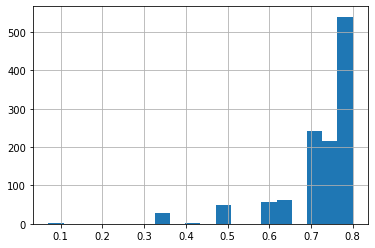

In [ ]:
display(dftrain.targeted_productivity.hist(bins = 20)) # Вывод: больше всего сотрудников с планируемой продуктивность около 80%

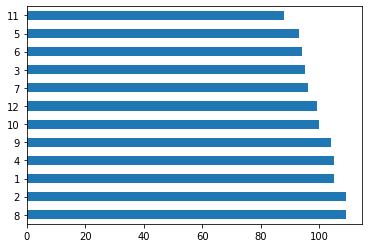

In [ ]:
display(dftrain['team'].value_counts().plot(kind='barh')) # Вывод: больше всего сотрудников из команды №8

Text(0.5, 0, 'targeted productivity')

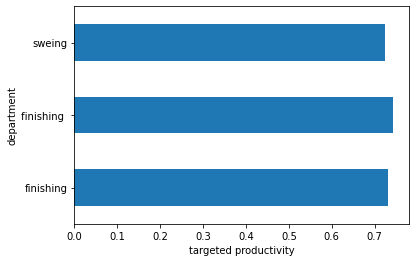

In [ ]:
pd.concat([dataset], axis=1).groupby('department').targeted_productivity.mean().plot(kind='barh').set_xlabel('targeted productivity')
# Методом concat соединим 2 датафрейма с масштабом 1, сгруппируем по отделению (департаменту), отсортируем по планируемой продуктивности и построим график

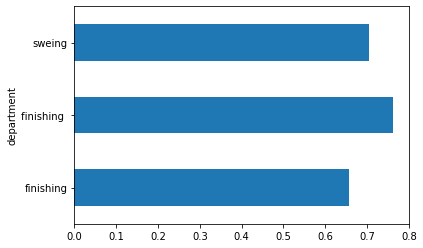

In [ ]:
(dataset.loc[dataset['team'] == 8]).groupby('department').targeted_productivity.mean().plot(kind='barh')

Можно сделать следующие выводы:


*   Пиковая планируемая продуктивность - 80 %, таких сотрудников около 300-т
*   Больше всего сотрудников из команды №8
*   Целевая продуктивность больше всего у сотрудников из департамента finishing
* Сотрудники команды №8 работают больше всего в finishing департаменте, их средняя пиковая производительность больше, чем у департамента sweing



### Creating and education of model (variant for LinearRegression)

In [ ]:
# Создадим объект типа LinearRegression и обучим его
linr = LinearRegression();

linr.fit(dftrain, ytrain)

print(linr.get_params())
print(linr.score(dftrain, ytrain)) #выведем коофиценты intercept и coef

# Вывод: точность модели - 33 %. Это очень мало

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
0.3398461829855425


### Testing of model and plot the graphic

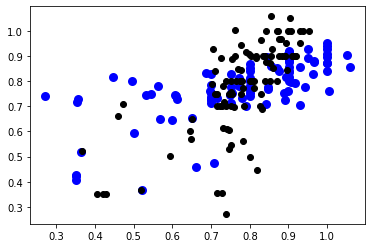

In [ ]:
predict_values = linr.predict(dftest) # Предсказываем, какое должно быть значение actual_productivity

# Просмотрим значение какое должно быть и предсказанное на графике (возьмем к примеру over_time)
plt.scatter(ytest[:100],predict_values[:100], color='blue', linewidth=3)# нарисуем его
plt.scatter(predict_values[:100], ytest[:100],  color='black') # и желаемый
plt.show()

### Let's compare the predicted and actual value

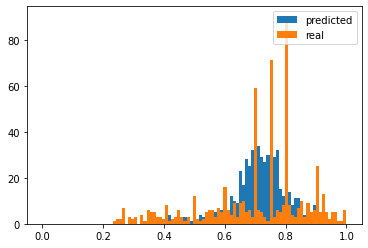

In [ ]:
pred_dicts = list(predict_values)
probs = pd.Series(pred_dicts)

bins = np.linspace(0, 1, 100)

plt.hist(probs, bins, label='predicted')
plt.hist(ytest, bins, label='real')
plt.legend(loc='upper right')
plt.show()

Вывод:
* Несмотря на некоторое различие, в среднем все данные распределены также.
* Большая точность будет достигаться увеличением количества эпох обучения (проверим далее)

   
# => Classification model (by using DNNClassifier).


## Dataset
Загрузим взятый нами из интернета датасет. Разделим на два - обучающий и тестовый. Пропуски с помощью Pandas заполним нулями, а нумерацию для тестового сбросим (для красоты)

Датасет посвящен данным акселерометра по вибрации вентилятора кулера с грузами на лопастях. Его можно использовать для прогнозирования, классификации и других задач, требующих анализа вибрации, особенно в двигателях.

In [ ]:
dataset_cfc = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00611/accelerometer.csv')

# Перемешаем все строки местами и сбросим нумерацию, удалим новую колонку с индексами
dataset_cfc = dataset_cfc.sample(frac=1).reset_index().drop('index',axis=1)

# Выведем на экран первые 5 строк, убедившись что все нормально
display(dataset_cfc.head(), dataset_cfc.shape)

# Разделим 75/25 (тестовые / обучающие), то есть на 114750 и оставшееся
df_train = dataset_cfc.loc[:114750].reset_index().drop('index',axis=1)
df_test = dataset_cfc.loc[114750:].reset_index().drop('index',axis=1)

y_train = df_train.pop('wconfid')
y_test = df_test.pop('wconfid')

# print('---------')
# print(df_train)
# print(y_train)

,wconfid,pctid,x,y,z
0,1,65,1.148,0.457,0.281
1,3,80,0.980,0.078,-0.105
2,2,20,1.004,0.000,-0.125
3,1,35,1.055,-0.090,-0.086
4,1,55,0.867,0.227,-0.121


(153000, 5)

## Input function
Необходима для преобразования данных

In [ ]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    func_ds = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    # Shuffle and repeat if you are in training mode.
    if training:
        func_ds = func_ds.shuffle(1000).repeat()
    
    return func_ds.batch(batch_size)

## Feature columns
Составим словарь из названий столбцов (необходим для обучения)

In [ ]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in df_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='pctid', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='y', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='z', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


## Building the model
Будем использовать DNNClassifier (именно его рекомендует TensorFlow)

In [ ]:
# Построим DNN (deep neural network) с 2 скрытыми слоями и 30 и 10 нейронами соответственно
classifier = tf.estimator.DNNClassifier(feature_columns=my_feature_columns, hidden_units=[30,10], n_classes = 5)
# Здесь:
# feature_columns - словарь из наименований столбцов и их возможных значений (в нашем случае все переменные - числовые)
# hidden_units - количество "слоев" нейронной сети
# n_classes - количество возможных классов

## Training the model
Здесь steps - количество шагов (примерно похоже на epochs для линейной регрессии)
Для обучения используем lambda (анонимную функцию)

In [ ]:
classifier.train( input_fn=lambda: input_fn(df_train, y_train, training=True), steps=1375000)

Instructions for updating:
Use standard file APIs to delete files with this prefix.


## Get statisctics (evaluation)
Получим статистику, чтобы посмотреть насколько модель надежна. Для этого используем тестовые данные

In [ ]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(df_test, y_test, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.555



Достаточно мало, но это с малым количеством шагов

## Get predictions 

In [ ]:
# Оптимизируем нашу входную функцию
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

# Наши столбцы
features = ['pctid', 'x', 'y', 'z']
predict = {}

# Выпишем всевозможные значения предсказания с помощью unique()
variations = dataset_cfc['wconfid'].unique()

print("Введите данные (обязательно с точкой в конце): ")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False
  # таким образом составим словарь из названия переменной и ее значения
  predict[feature] = [float(val)]

# Протестируем модель, возьмем с нее значение
predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        variations[class_id], 100 * probability))

Введите данные (обязательно с точкой в конце): 
pctid: 35.0
x: 1.0
y: 1.0
z: 1.0
Prediction is "3" (60.0%)


# => Hidden Markov Models

Данные, которые нам нужны:

**Состояния:** В каждой модели Маркова есть конечное множество состояний. Эти состояния могут быть "красное", "зеленое", "синие" или "холодное", "теплое". Мы не наблюдаем сами эти состояния, поэтому модель и называется скрытой

**Наблюдения.** С каждым состоянием связан определенный результат или наблюдение, основанное на распределении вероятностей. 
Пример: в жаркий день кошке захочется пить 3 раза за день с вероятностью 80 %

**Переходы.** Каждое состояние будет иметь вероятность, определяющую вероятность перехода в другое состояние. 
Пример: *за холодным днем с вероятностью 30% следует жаркий день и с вероятностью 70% последует другой холодный день.*


Для создания скрытой модели Маркова нам понадобится.
- Состояния
- Распределение наблюдений
- Распределение перехода

## Setup

In [ ]:
!pip install tensorflow_probability==0.8.0rc0 --user --upgrade

import tensorflow_probability as tfp 
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.25.2 requires cloudpickle>=1.2.0, but you have cloudpickle 1.1.1 which is incompatible.
distributed 2022.2.1 requires cloudpickle>=1.5.0, but you have cloudpickle 1.1.1 which is incompatible.


## "Dataset"

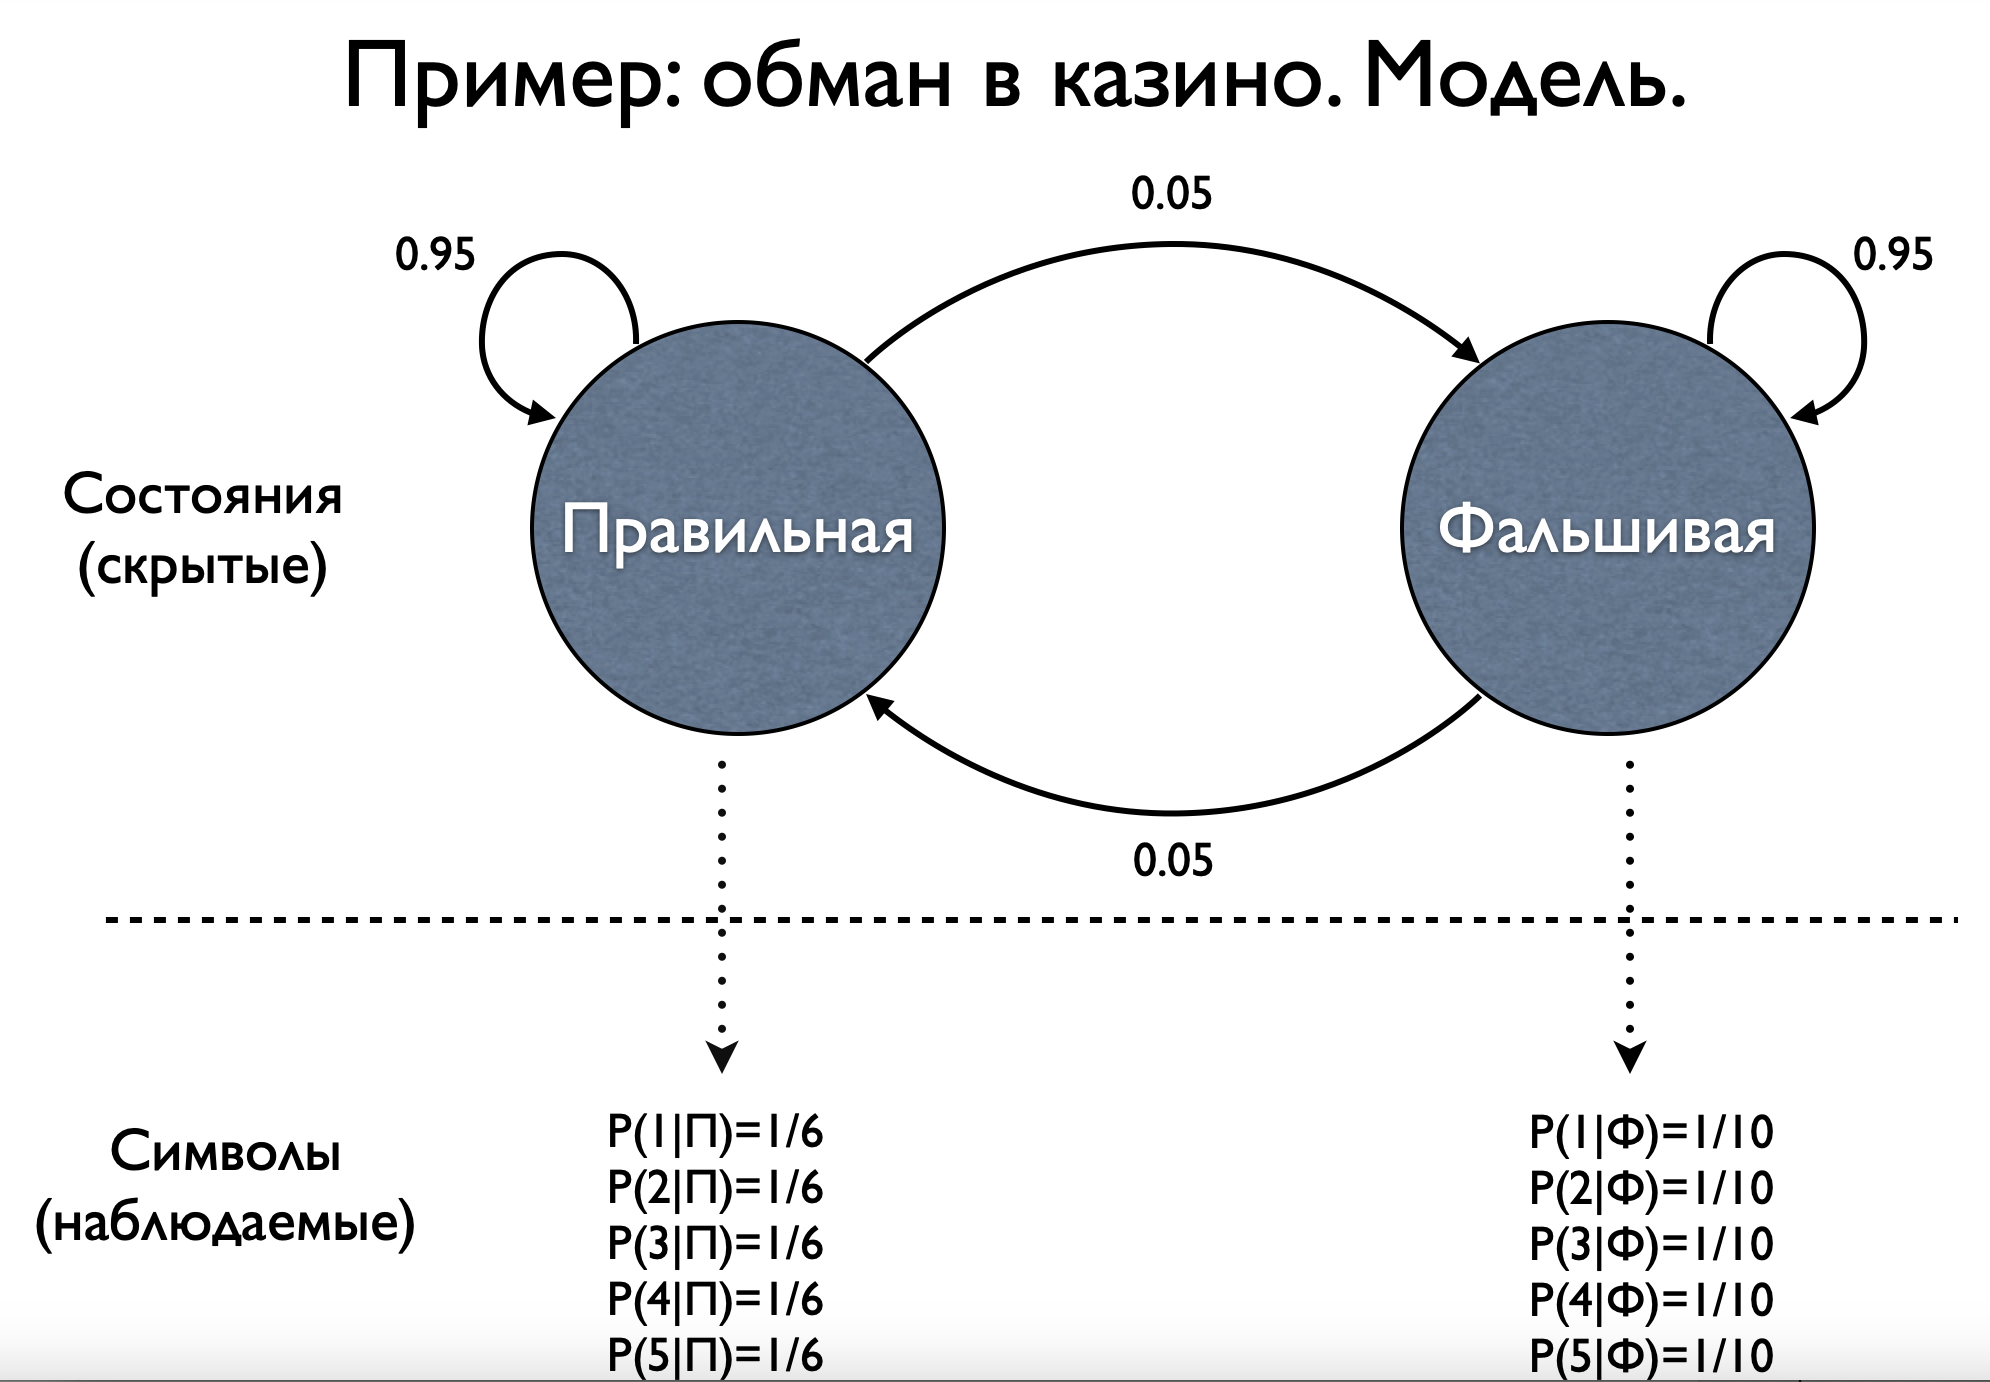

In [ ]:
# Правильная зашифровано как 0, фальшивая как 1
tfd = tfp.distributions  # making a shortcut for later on
initial_distribution = tfd.Categorical(probs=[0.95, 0.05])  # Вероятности, что первый раз будут таким
transition_distribution = tfd.Categorical(probs=[[0.5, 0.5], 
                                                 [0.05, 0.95]]) 
observation_distribution = tfd.Normal(loc=[0., 6.], scale=[5., 10.])  

## Creating the model:

In [ ]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7)

## Results of education:

In [ ]:
mean = model.mean()

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
with tf.compat.v1.Session() as sess:  
  print(mean.numpy())

[0.3       3.1349998 4.41075   4.9848375 5.2431774 5.35943   5.411743 ]
